# Kecerdasan Buatan - UAS
**Nama: Hermanus Rangga Horo**  
**Nim : 71220826**  
**Grup : A**  

Kasus : Deteksi Kecurangan Asursansi

### Visualisasi Data  
Sebelum cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('Asuransi.csv')
# print(df.head(5))
total_baris,total_kolom=df.shape  #TOTAL DATA (baris,kolom) SBLM CLEAN
print(f"Total Baris/Kasus pada Data : {total_baris}")
print(f"Total Kolom pada Data : {total_kolom}")

Total Baris/Kasus pada Data : 1000
Total Kolom pada Data : 69


In [3]:
df.head(10)

,Unnamed: 0,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
0,0,53300,0,5,1,2,71610,1,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,8,1,0,5070,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,35100,0,7,3,3,34650,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,48900,-62400,5,1,2,63400,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,66000,-46000,20,1,1,6500,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,5,0,0,19,3,2,64100,1,1,0,...,0,0,0,0,0,0,0,1,0,0
6,6,0,-77000,0,3,0,78650,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,7,0,0,23,3,2,51590,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8,8,0,0,21,1,1,27700,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9,9,0,-39300,14,1,1,42300,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Unnamed: 0                              1000 non-null   int64
 1   capital-gains                           1000 non-null   int64
 2   capital-loss                            1000 non-null   int64
 3   incident_hour_of_the_day                1000 non-null   int64
 4   number_of_vehicles_involved             1000 non-null   int64
 5   witnesses                               1000 non-null   int64
 6   total_claim_amount                      1000 non-null   int64
 7   fraud_reported                          1000 non-null   int64
 8   insured_sex_FEMALE                      1000 non-null   int64
 9   insured_sex_MALE                        1000 non-null   int64
 10  insured_occupation_adm-clerical         1000 non-null   int64
 11  insured_occupation

Unnamed: 0                                int64
capital-gains                             int64
capital-loss                              int64
incident_hour_of_the_day                  int64
number_of_vehicles_involved               int64
                                          ...  
policy_annual_premium_groups_high         int64
policy_annual_premium_groups_low          int64
policy_annual_premium_groups_medium       int64
policy_annual_premium_groups_very high    int64
policy_annual_premium_groups_very low     int64
Length: 69, dtype: object

### Akusisi Data dan Pembersihan  
Menganti Kolom 31 collision_type_? dengan nama kolom yang lebih jelas.    
- collision_type_? = collision_type_other  

In [8]:
df = df.rename(columns={
    'collision_type_?': 'collision_type_other'
})

Memeriksa value data apa saja yang ada di di setiap kolom, untuk memastikan sudah sesuai dengan tipe data yang di pakai.  
Note : Untuk lebih detailnya buka file `detail_value.txt`

In [ ]:
with open('detail_value.txt', 'w') as f:
    for col in df.columns:
        if col != "Unnamed: 0": #Skip Baris NO
            f.write(f"Detail Kolom : '{col}':\n")
            df[col].value_counts()
            f.write(df[col].value_counts().to_string())
            f.write("\n\n")

<b>Memeriksa Data yang kosong</b>  
Menghitung data yang dari tiap kolom dan baris yang tidak terisi.  
Note : Untuk lebih detailnua buka file `data_tidak_valid.txt`  
*Dari hasil yang di tunjukan, data tidak ada yang kosong*

In [ ]:
tidak_valid=df.isnull().sum()
print(tidak_valid)
with open('data_tidak_valid.txt', 'w') as f: #Menyimpan data dalam txt, agar bisa dilihat semua
    f.write(tidak_valid.to_string())

Menghapus Kolom yang tidak diperlukan.  
Selanjutnya kita menghapus kolom yang tidak di perlukan, dalam hal ini data yang tidak memiliki korelasi dengan model yang akan ditrain.  

### Kolom yang dihapus ###
- Unnamed: 0 (kolom penomoran tidak di butuhkan)
#### Kolom-kolom hobi tidak diperlukan
- insured_hobbies_chess
- insured_hobbies_cross-fit
- insured_hobbies_other

In [21]:
hapus = ["Unnamed: 0", "insured_hobbies_chess", "insured_hobbies_crossb-fit", "insured_hobbies_other"]
df = df.drop(columns=hapus) # Menghapus data dengan kolom-kolom diatas.

df.to_csv('Clean_Data.csv', index=False) #menyimpan data yang sudah di bersihkan

In [48]:
df=pd.read_csv('Clean_Data.csv')
# df.info()
# df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   capital-gains                           1000 non-null   int64
 1   capital-loss                            1000 non-null   int64
 2   incident_hour_of_the_day                1000 non-null   int64
 3   number_of_vehicles_involved             1000 non-null   int64
 4   witnesses                               1000 non-null   int64
 5   total_claim_amount                      1000 non-null   int64
 6   fraud_reported                          1000 non-null   int64
 7   insured_sex_FEMALE                      1000 non-null   int64
 8   insured_sex_MALE                        1000 non-null   int64
 9   insured_occupation_adm-clerical         1000 non-null   int64
 10  insured_occupation_armed-forces         1000 non-null   int64
 11  insured_occupation

capital-gains                             int64
capital-loss                              int64
incident_hour_of_the_day                  int64
number_of_vehicles_involved               int64
witnesses                                 int64
                                          ...  
policy_annual_premium_groups_high         int64
policy_annual_premium_groups_low          int64
policy_annual_premium_groups_medium       int64
policy_annual_premium_groups_very high    int64
policy_annual_premium_groups_very low     int64
Length: 65, dtype: object

# Visualisasi Data Setelah Cleaning
## Kecurangan yang Dilaporkan

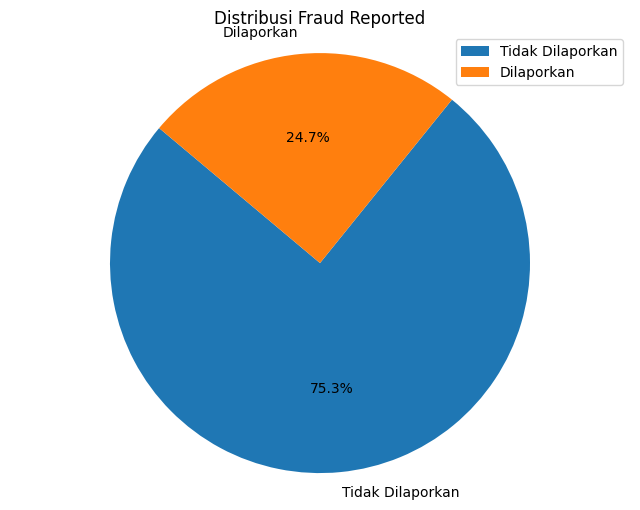

In [66]:
kecurangan=df['fraud_reported'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(kecurangan, labels=['Tidak Dilaporkan', 'Dilaporkan'], autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Fraud Reported')
plt.axis('equal')
plt.legend(['Tidak Dilaporkan', 'Dilaporkan'], loc="best")
plt.show()

## Jumlah Klaim Berdasakan Insiden

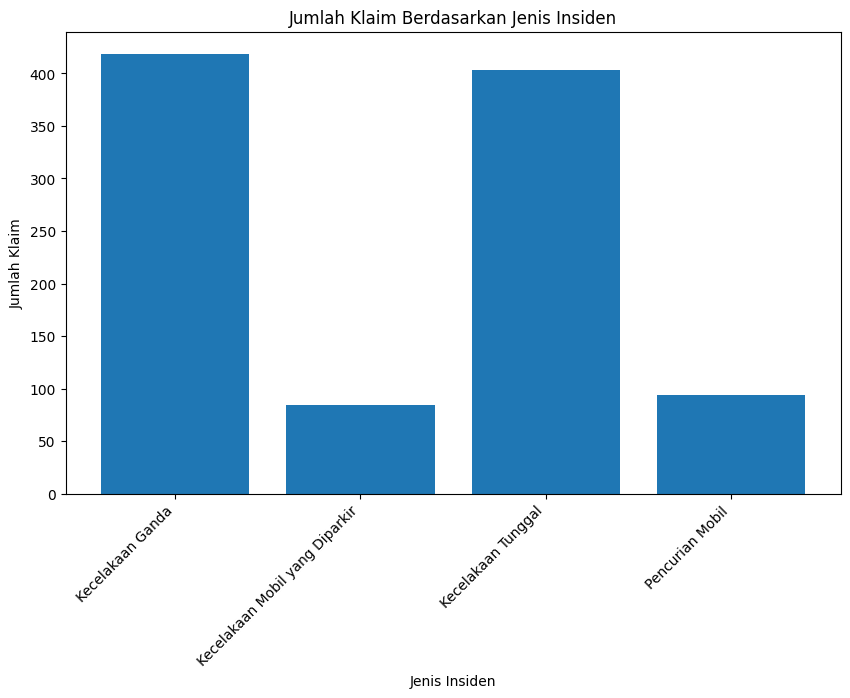

In [34]:
insiden = ['incident_type_Multi-vehicle Collision', 'incident_type_Parked Car',
                  'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft']
insiden_count = [df[col].sum() for col in insiden]
insiden=["Kecelakaan Ganda","Kecelakaan Mobil yang Diparkir","Kecelakaan Tunggal","Pencurian Mobil"] 
plt.figure(figsize=(10, 6))
plt.bar(insiden, insiden_count)
plt.title('Jumlah Klaim Berdasarkan Jenis Insiden')
plt.xlabel('Jenis Insiden')
plt.ylabel('Jumlah Klaim')
plt.xticks(rotation=45, ha='right')
plt.show()


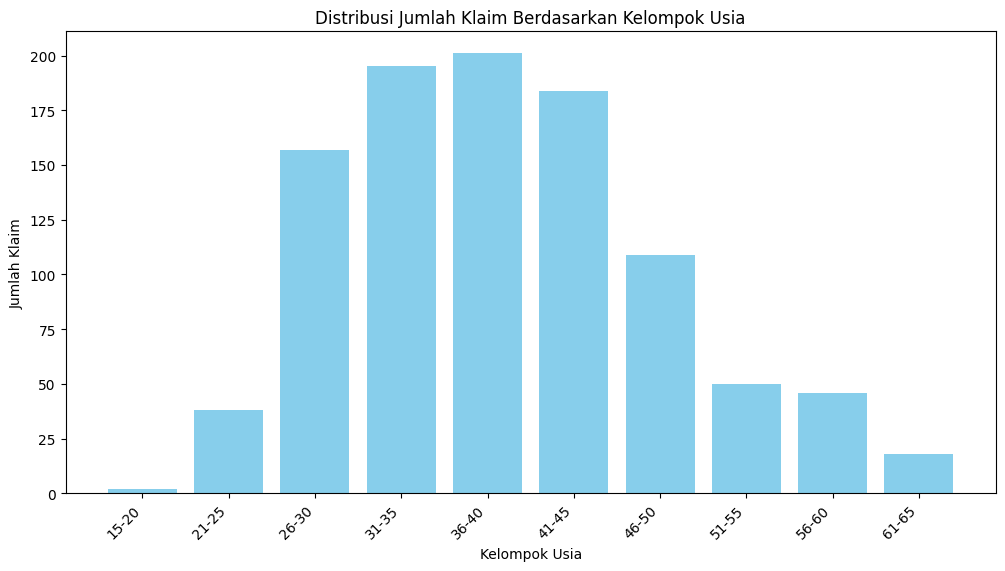

In [36]:
age_groups = ['age_group_15-20', 'age_group_21-25', 'age_group_26-30', 'age_group_31-35', 
              'age_group_36-40', 'age_group_41-45', 'age_group_46-50', 'age_group_51-55', 
              'age_group_56-60', 'age_group_61-65']
age_counts = [df[col].sum() for col in age_groups]
age_groups = ['15-20', '21-25', '26-30', '31-35', 
              '36-40', '41-45', '46-50', '51-55', 
              '56-60', '61-65']

plt.figure(figsize=(12, 6))
plt.bar(age_groups, age_counts, color='skyblue')
plt.title('Distribusi Jumlah Klaim Berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Klaim')
plt.xticks(rotation=45, ha='right')
plt.show()

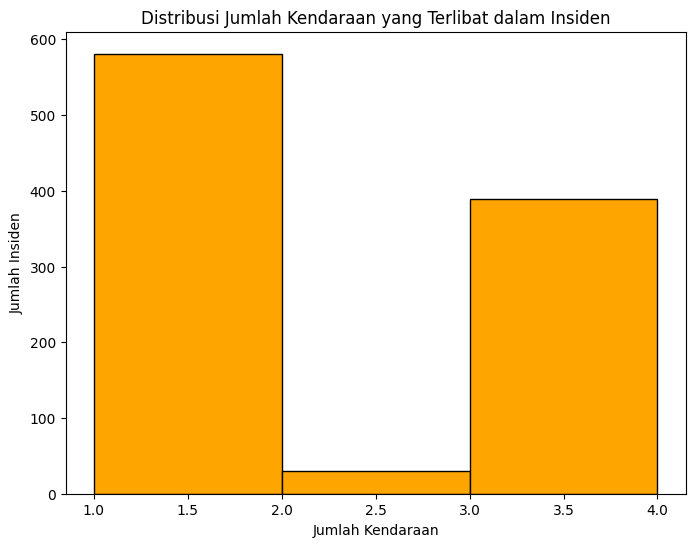

In [37]:
plt.figure(figsize=(8, 6))
plt.hist(df['number_of_vehicles_involved'], bins=range(1, df['number_of_vehicles_involved'].max() + 1), color='orange', edgecolor='black')
plt.title('Distribusi Jumlah Kendaraan yang Terlibat dalam Insiden')
plt.xlabel('Jumlah Kendaraan')
plt.ylabel('Jumlah Insiden')
plt.show()

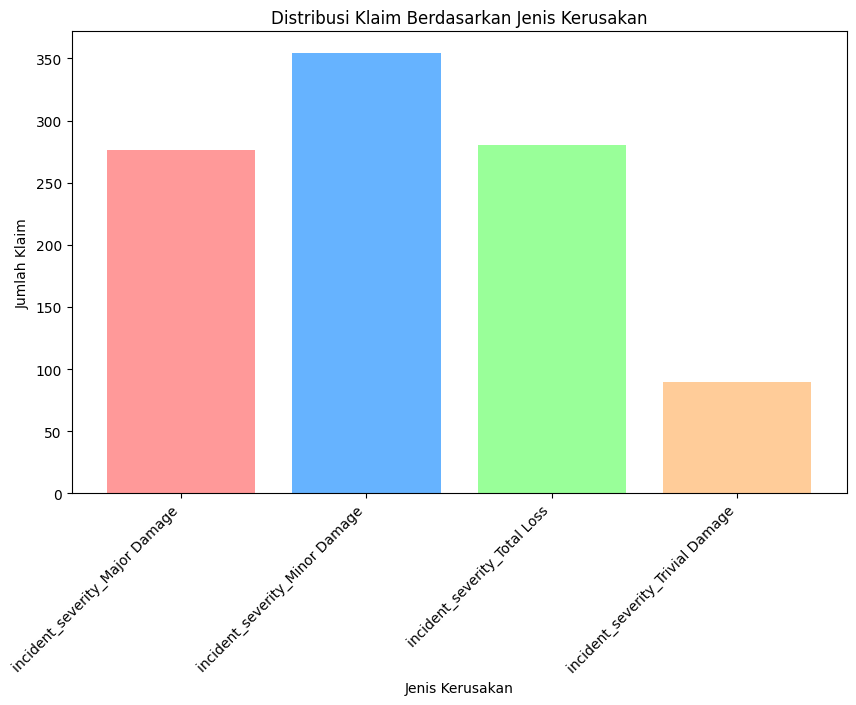

In [39]:
severity_types = ['incident_severity_Major Damage', 'incident_severity_Minor Damage', 
                  'incident_severity_Total Loss', 'incident_severity_Trivial Damage']
severity_counts = [df[col].sum() for col in severity_types]

plt.figure(figsize=(10, 6))
plt.bar(severity_types, severity_counts, color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribusi Klaim Berdasarkan Jenis Kerusakan')
plt.xlabel('Jenis Kerusakan')
plt.ylabel('Jumlah Klaim')
plt.xticks(rotation=45, ha='right')
plt.show()


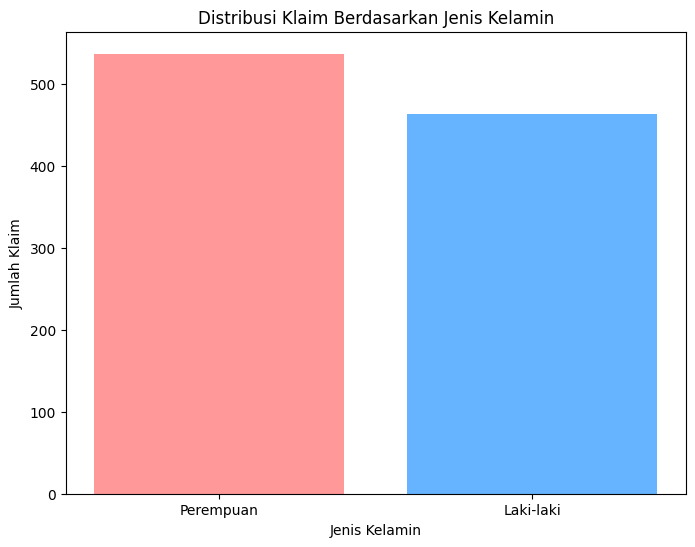

In [40]:
sex_counts = [df['insured_sex_FEMALE'].sum(), df['insured_sex_MALE'].sum()]

plt.figure(figsize=(8, 6))
plt.bar(['Perempuan', 'Laki-laki'], sex_counts, color=['#ff9999','#66b3ff'])
plt.title('Distribusi Klaim Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Klaim')
plt.show()


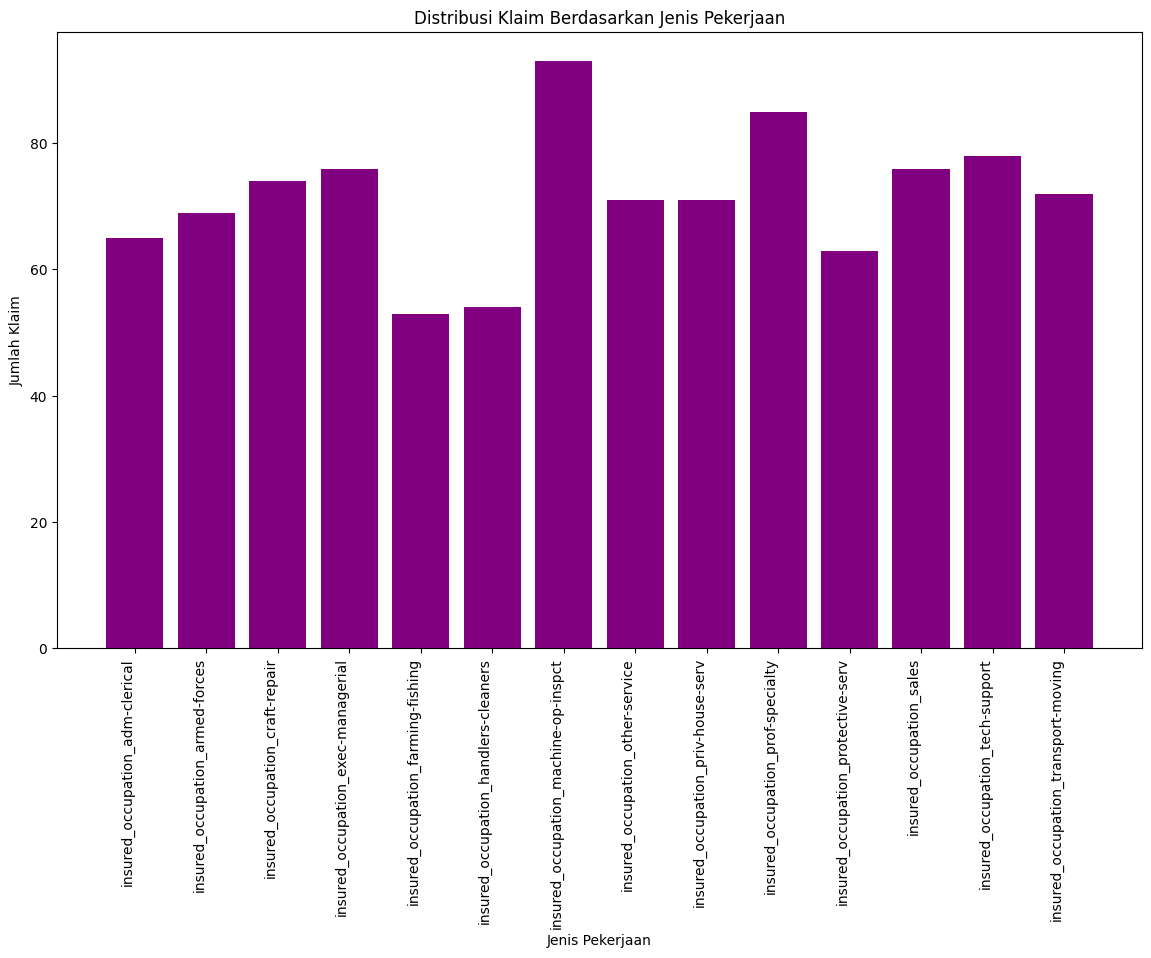

In [41]:
occupation_columns = [col for col in df.columns if col.startswith('insured_occupation')]
occupation_counts = [df[col].sum() for col in occupation_columns]

plt.figure(figsize=(14, 8))
plt.bar(occupation_columns, occupation_counts, color='purple')
plt.title('Distribusi Klaim Berdasarkan Jenis Pekerjaan')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Jumlah Klaim')
plt.xticks(rotation=90, ha='right')
plt.show()


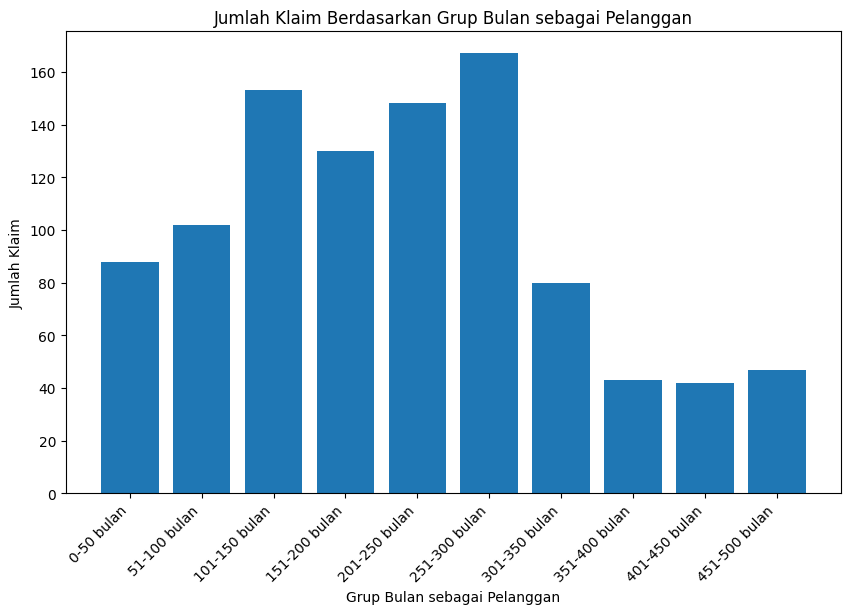

In [49]:
# Memperoleh jumlah klaim untuk setiap grup bulan sebagai pelanggan
bulan_labels = [
    '0-50 bulan', '51-100 bulan', '101-150 bulan', '151-200 bulan',
    '201-250 bulan', '251-300 bulan', '301-350 bulan', '351-400 bulan',
    '401-450 bulan', '451-500 bulan'
]

# Memperoleh jumlah klaim untuk setiap grup bulan sebagai pelanggan
bulan_count = [
    df['months_as_customer_groups_0-50'].sum(),
    df['months_as_customer_groups_51-100'].sum(),
    df['months_as_customer_groups_101-150'].sum(),
    df['months_as_customer_groups_151-200'].sum(),
    df['months_as_customer_groups_201-250'].sum(),
    df['months_as_customer_groups_251-300'].sum(),
    df['months_as_customer_groups_301-350'].sum(),
    df['months_as_customer_groups_351-400'].sum(),
    df['months_as_customer_groups_401-450'].sum(),
    df['months_as_customer_groups_451-500'].sum()
]

# Membuat grafik batang
plt.figure(figsize=(10, 6))
plt.bar(bulan_labels, bulan_count)
plt.title('Jumlah Klaim Berdasarkan Grup Bulan sebagai Pelanggan')
plt.xlabel('Grup Bulan sebagai Pelanggan')
plt.ylabel('Jumlah Klaim')
plt.xticks(rotation=45, ha='right')
plt.show()


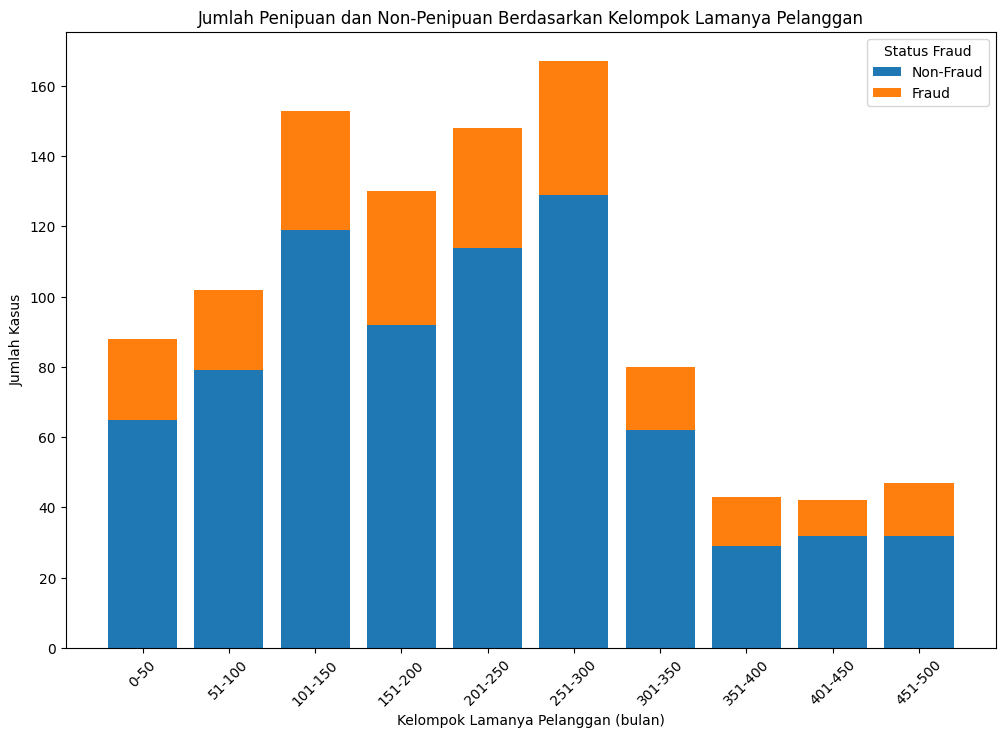

In [64]:
month_groups = [
    'months_as_customer_groups_0-50',
    'months_as_customer_groups_51-100',
    'months_as_customer_groups_101-150',
    'months_as_customer_groups_151-200',
    'months_as_customer_groups_201-250',
    'months_as_customer_groups_251-300',
    'months_as_customer_groups_301-350',
    'months_as_customer_groups_351-400',
    'months_as_customer_groups_401-450',
    'months_as_customer_groups_451-500'
]
fraud_counts = {group: df[df['fraud_reported'] == 1][group].sum() for group in month_groups}
non_fraud_counts = {group: df[df['fraud_reported'] == 0][group].sum() for group in month_groups}

categories = ['0-50', '51-100', '101-150', '151-200', '201-250', 
              '251-300', '301-350', '351-400', '401-450', '451-500']
fraud_values = list(fraud_counts.values())
non_fraud_values = list(non_fraud_counts.values())

plt.figure(figsize=(12, 8))
plt.bar(categories, non_fraud_values, label='Non-Fraud')
plt.bar(categories, fraud_values, bottom=non_fraud_values, label='Fraud')

plt.title('Jumlah Penipuan dan Non-Penipuan Berdasarkan Kelompok Lamanya Pelanggan')
plt.xlabel('Kelompok Lamanya Pelanggan (bulan)')
plt.ylabel('Jumlah Kasus')
plt.legend(title='Status Fraud')
plt.xticks(rotation=45)
plt.show()

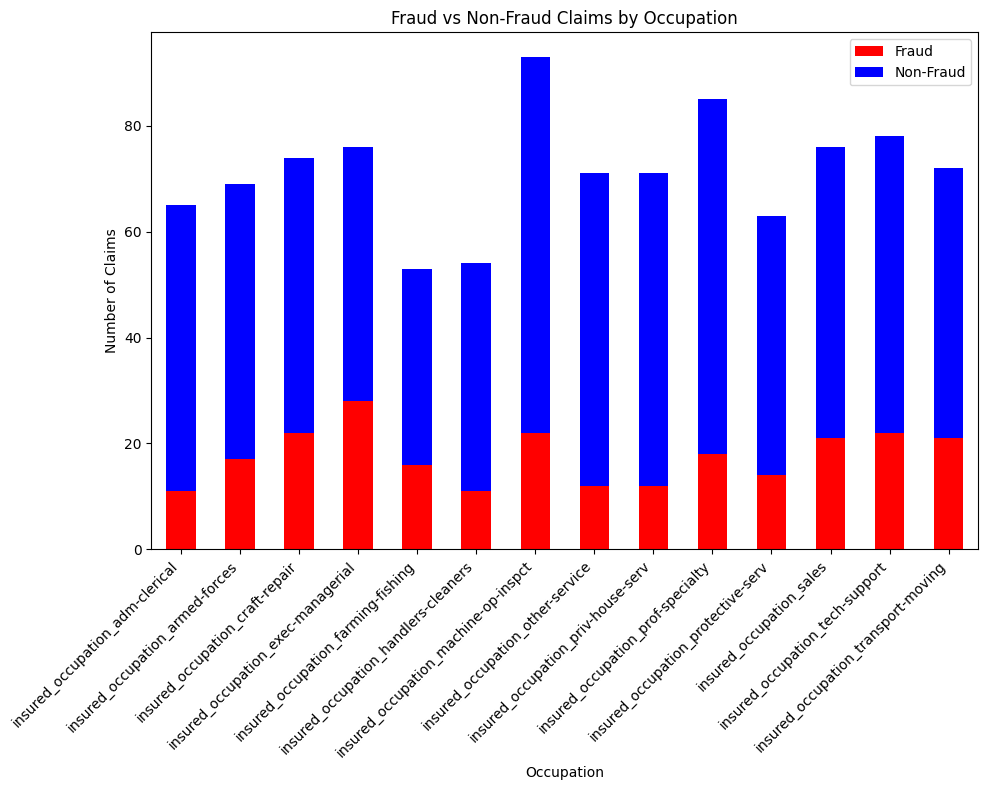

In [65]:
occupation_cols = [
    'insured_occupation_adm-clerical', 'insured_occupation_armed-forces',
    'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
    'insured_occupation_farming-fishing', 'insured_occupation_handlers-cleaners',
    'insured_occupation_machine-op-inspct', 'insured_occupation_other-service',
    'insured_occupation_priv-house-serv', 'insured_occupation_prof-specialty',
    'insured_occupation_protective-serv', 'insured_occupation_sales',
    'insured_occupation_tech-support', 'insured_occupation_transport-moving'
]
# Summarize the data
fraud_data = []
for col in occupation_cols:
    fraud_count = df[(df[col] == 1) & (df['fraud_reported'] == 1)].shape[0]
    non_fraud_count = df[(df[col] == 1) & (df['fraud_reported'] == 0)].shape[0]
    fraud_data.append((col, fraud_count, non_fraud_count))

# Create a DataFrame for plotting
fraud_summary_df = pd.DataFrame(fraud_data, columns=['Occupation', 'Fraud', 'Non-Fraud'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
fraud_summary_df.set_index('Occupation').plot(kind='bar', stacked=True, ax=ax, color=['red', 'blue'])
ax.set_title('Fraud vs Non-Fraud Claims by Occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Number of Claims')
plt.xticks(rotation=45, ha='right')
plt.legend(['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Memuat data
df = pd.read_csv('Clean_Data.csv')  # ganti 'your_data.csv' dengan nama file CSV Anda

# Pilih fitur dan label
features = [
    'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 
    'witnesses', 'total_claim_amount', 'insured_sex_FEMALE', 'insured_sex_MALE', 
    'insured_occupation_adm-clerical', 'insured_occupation_armed-forces', 
    'insured_occupation_craft-repair', 'insured_occupation_exec-managerial', 
    'insured_occupation_farming-fishing', 'insured_occupation_handlers-cleaners', 
    'insured_occupation_machine-op-inspct', 'insured_occupation_other-service', 
    'insured_occupation_priv-house-serv', 'insured_occupation_prof-specialty', 
    'insured_occupation_protective-serv', 'insured_occupation_sales', 
    'insured_occupation_tech-support', 'insured_occupation_transport-moving', 
    'incident_type_Multi-vehicle Collision', 'incident_type_Parked Car', 
    'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft', 
    'collision_type_other', 'collision_type_Front Collision', 'collision_type_Rear Collision', 
    'collision_type_Side Collision', 'incident_severity_Major Damage', 
    'incident_severity_Minor Damage', 'incident_severity_Total Loss', 
    'incident_severity_Trivial Damage', 'authorities_contacted_Ambulance', 
    'authorities_contacted_Fire', 'authorities_contacted_None', 'authorities_contacted_Other', 
    'authorities_contacted_Police', 'age_group_15-20', 'age_group_21-25', 'age_group_26-30', 
    'age_group_31-35', 'age_group_36-40', 'age_group_41-45', 'age_group_46-50', 
    'age_group_51-55', 'age_group_56-60', 'age_group_61-65', 'months_as_customer_groups_0-50', 
    'months_as_customer_groups_51-100', 'months_as_customer_groups_101-150', 
    'months_as_customer_groups_151-200', 'months_as_customer_groups_201-250', 
    'months_as_customer_groups_251-300', 'months_as_customer_groups_301-350', 
    'months_as_customer_groups_351-400', 'months_as_customer_groups_401-450', 
    'months_as_customer_groups_451-500', 'policy_annual_premium_groups_high', 
    'policy_annual_premium_groups_low', 'policy_annual_premium_groups_medium', 
    'policy_annual_premium_groups_very high', 'policy_annual_premium_groups_very low'
]
X = df[features]
y = df['fraud_reported']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Latih model menggunakan Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Prediksi menggunakan model yang sudah dilatih
y_pred = model.predict(X_test_scaled)

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Menyimpan model dan scaler
joblib.dump(model, 'fraud_detection_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

Confusion Matrix:
[[504  97]
 [117  82]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       601
           1       0.46      0.41      0.43       199

    accuracy                           0.73       800
   macro avg       0.63      0.63      0.63       800
weighted avg       0.72      0.73      0.73       800


Accuracy Score:
0.7325


['scaler.pkl']

In [82]:
# import numpy as np

# def preprocess_input(
#     capital_gains, capital_loss, incident_hour_of_the_day, number_of_vehicles_involved,
#     witnesses, total_claim_amount, insured_sex, insured_occupation, incident_type, 
#     collision_type, incident_severity, authorities_contacted, age_group, months_as_customer,
#     policy_annual_premium
# ):
#     # Inisialisasi array input dengan panjang yang sama dengan jumlah fitur
#     input_array = np.zeros(64)
    
#     # Fitur numerik langsung diisi
#     input_array[0] = capital_gains
#     input_array[1] = capital_loss
#     input_array[2] = incident_hour_of_the_day
#     input_array[3] = number_of_vehicles_involved
#     input_array[4] = witnesses
#     input_array[5] = total_claim_amount
    
#     # Fitur kategorikal
#     if insured_sex == 'FEMALE':
#         input_array[6] = 1
#     else:
#         input_array[7] = 1

#     occupations = [
#         'adm-clerical', 'armed-forces', 'craft-repair', 'exec-managerial',
#         'farming-fishing', 'handlers-cleaners', 'machine-op-inspct', 'other-service',
#         'priv-house-serv', 'prof-specialty', 'protective-serv', 'sales', 'tech-support', 'transport-moving'
#     ]
#     for i, occupation in enumerate(occupations):
#         if insured_occupation == occupation:
#             input_array[8 + i] = 1

#     incident_types = ['Multi-vehicle Collision', 'Parked Car', 'Single Vehicle Collision', 'Vehicle Theft']
#     for i, itype in enumerate(incident_types):
#         if incident_type == itype:
#             input_array[22 + i] = 1

#     collision_types = ['other', 'Front Collision', 'Rear Collision', 'Side Collision']
#     for i, ctype in enumerate(collision_types):
#         if collision_type == ctype:
#             input_array[26 + i] = 1

#     incident_severities = ['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage']
#     for i, severity in enumerate(incident_severities):
#         if incident_severity == severity:
#             input_array[30 + i] = 1

#     authorities_contacted_options = ['Ambulance', 'Fire', 'None', 'Other', 'Police']
#     for i, authority in enumerate(authorities_contacted_options):
#         if authorities_contacted == authority:
#             input_array[34 + i] = 1

#     age_groups = [
#         '15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65'
#     ]
#     for i, age in enumerate(age_groups):
#         if age_group == age:
#             input_array[39 + i] = 1

#     if months_as_customer <= 50:
#         input_array[49] = 1
#     elif months_as_customer <= 100:
#         input_array[50] = 1
#     elif months_as_customer <= 150:
#         input_array[51] = 1
#     elif months_as_customer <= 200:
#         input_array[52] = 1
#     elif months_as_customer <= 250:
#         input_array[53] = 1
#     elif months_as_customer <= 300:
#         input_array[54] = 1
#     elif months_as_customer <= 350:
#         input_array[55] = 1
#     elif months_as_customer <= 400:
#         input_array[56] = 1
#     elif months_as_customer <= 450:
#         input_array[57] = 1
#     else:
#         input_array[58] = 1

#     policy_annual_premium_options = ['high', 'low', 'medium', 'very high', 'very low']
#     for i, premium in enumerate(policy_annual_premium_options):
#         if policy_annual_premium == premium:
#             input_array[59 + i] = 1

#     return input_array


In [83]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

# Fungsi preprocessing input
def preprocess_input(
    capital_gains, capital_loss, incident_hour_of_the_day, number_of_vehicles_involved,
    witnesses, total_claim_amount, insured_sex, insured_occupation, incident_type, 
    collision_type, incident_severity, authorities_contacted, age_group, months_as_customer,
    policy_annual_premium
):
    # Inisialisasi array input dengan panjang yang sama dengan jumlah fitur
    input_array = np.zeros(64)
    
    # Fitur numerik langsung diisi
    input_array[0] = capital_gains
    input_array[1] = capital_loss
    input_array[2] = incident_hour_of_the_day
    input_array[3] = number_of_vehicles_involved
    input_array[4] = witnesses
    input_array[5] = total_claim_amount
    
    # Fitur kategorikal
    if insured_sex == 'FEMALE':
        input_array[6] = 1
    else:
        input_array[7] = 1

    occupations = [
        'adm-clerical', 'armed-forces', 'craft-repair', 'exec-managerial',
        'farming-fishing', 'handlers-cleaners', 'machine-op-inspct', 'other-service',
        'priv-house-serv', 'prof-specialty', 'protective-serv', 'sales', 'tech-support', 'transport-moving'
    ]
    for i, occupation in enumerate(occupations):
        if insured_occupation == occupation:
            input_array[8 + i] = 1

    incident_types = ['Multi-vehicle Collision', 'Parked Car', 'Single Vehicle Collision', 'Vehicle Theft']
    for i, itype in enumerate(incident_types):
        if incident_type == itype:
            input_array[22 + i] = 1

    collision_types = ['other', 'Front Collision', 'Rear Collision', 'Side Collision']
    for i, ctype in enumerate(collision_types):
        if collision_type == ctype:
            input_array[26 + i] = 1

    incident_severities = ['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage']
    for i, severity in enumerate(incident_severities):
        if incident_severity == severity:
            input_array[30 + i] = 1

    authorities_contacted_options = ['Ambulance', 'Fire', 'None', 'Other', 'Police']
    for i, authority in enumerate(authorities_contacted_options):
        if authorities_contacted == authority:
            input_array[34 + i] = 1

    age_groups = [
        '15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65'
    ]
    for i, age in enumerate(age_groups):
        if age_group == age:
            input_array[39 + i] = 1

    if months_as_customer <= 50:
        input_array[49] = 1
    elif months_as_customer <= 100:
        input_array[50] = 1
    elif months_as_customer <= 150:
        input_array[51] = 1
    elif months_as_customer <= 200:
        input_array[52] = 1
    elif months_as_customer <= 250:
        input_array[53] = 1
    elif months_as_customer <= 300:
        input_array[54] = 1
    elif months_as_customer <= 350:
        input_array[55] = 1
    elif months_as_customer <= 400:
        input_array[56] = 1
    elif months_as_customer <= 450:
        input_array[57] = 1
    else:
        input_array[58] = 1

    policy_annual_premium_options = ['high', 'low', 'medium', 'very high', 'very low']
    for i, premium in enumerate(policy_annual_premium_options):
        if policy_annual_premium == premium:
            input_array[59 + i] = 1

    return input_array

# Memuat model dan scaler
loaded_model = joblib.load('fraud_detection_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Fungsi untuk prediksi
def predict_fraud(
    capital_gains, capital_loss, incident_hour_of_the_day, number_of_vehicles_involved,
    witnesses, total_claim_amount, insured_sex, insured_occupation, incident_type, 
    collision_type, incident_severity, authorities_contacted, age_group, months_as_customer,
    policy_annual_premium
):
    # Preprocessing input
    input_array = preprocess_input(
        capital_gains, capital_loss, incident_hour_of_the_day, number_of_vehicles_involved,
        witnesses, total_claim_amount, insured_sex, insured_occupation, incident_type, 
        collision_type, incident_severity, authorities_contacted, age_group, months_as_customer,
        policy_annual_premium
    )

    # Scaling input
    scaled_input = loaded_scaler.transform([input_array])

    # Prediksi menggunakan model
    prediction = loaded_model.predict(scaled_input)
    probability = loaded_model.predict_proba(scaled_input)[0][1]

    return prediction[0], probability

# Tes kasus
capital_gains = 500
capital_loss = 200
incident_hour_of_the_day = 10
number_of_vehicles_involved = 2
witnesses = 1
total_claim_amount = 10000
insured_sex = 'FEMALE'
insured_occupation = 'sales'
incident_type = 'Multi-vehicle Collision'
collision_type = 'Front Collision'
incident_severity = 'Major Damage'
authorities_contacted = 'Police'
age_group = '36-40'
months_as_customer = 120
policy_annual_premium = 'medium'

# Prediksi
prediction, probability = predict_fraud(
    capital_gains, capital_loss, incident_hour_of_the_day, number_of_vehicles_involved,
    witnesses, total_claim_amount, insured_sex, insured_occupation, incident_type, 
    collision_type, incident_severity, authorities_contacted, age_group, months_as_customer,
    policy_annual_premium
)

print("Prediksi Fraud:", "Yes" if prediction == 1 else "No")
print("Probabilitas Fraud:", probability)


Prediksi Fraud: Yes
Probabilitas Fraud: 0.7965245370539981


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Memuat data
df = pd.read_csv('Clean_Data.csv')

# Pilih fitur dan label
features = [
    'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 
    'witnesses', 'total_claim_amount', 'insured_sex_FEMALE', 'insured_sex_MALE', 
    'insured_occupation_adm-clerical', 'insured_occupation_armed-forces', 
    'insured_occupation_craft-repair', 'insured_occupation_exec-managerial', 
    'insured_occupation_farming-fishing', 'insured_occupation_handlers-cleaners', 
    'insured_occupation_machine-op-inspct', 'insured_occupation_other-service', 
    'insured_occupation_priv-house-serv', 'insured_occupation_prof-specialty', 
    'insured_occupation_protective-serv', 'insured_occupation_sales', 
    'insured_occupation_tech-support', 'insured_occupation_transport-moving', 
    'incident_type_Multi-vehicle Collision', 'incident_type_Parked Car', 
    'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft', 
    'collision_type_other', 'collision_type_Front Collision', 'collision_type_Rear Collision', 
    'collision_type_Side Collision', 'incident_severity_Major Damage', 
    'incident_severity_Minor Damage', 'incident_severity_Total Loss', 
    'incident_severity_Trivial Damage', 'authorities_contacted_Ambulance', 
    'authorities_contacted_Fire', 'authorities_contacted_None', 'authorities_contacted_Other', 
    'authorities_contacted_Police', 'age_group_15-20', 'age_group_21-25', 'age_group_26-30', 
    'age_group_31-35', 'age_group_36-40', 'age_group_41-45', 'age_group_46-50', 
    'age_group_51-55', 'age_group_56-60', 'age_group_61-65', 'months_as_customer_groups_0-50', 
    'months_as_customer_groups_51-100', 'months_as_customer_groups_101-150', 
    'months_as_customer_groups_151-200', 'months_as_customer_groups_201-250', 
    'months_as_customer_groups_251-300', 'months_as_customer_groups_301-350', 
    'months_as_customer_groups_351-400', 'months_as_customer_groups_401-450', 
    'months_as_customer_groups_451-500', 'policy_annual_premium_groups_high', 
    'policy_annual_premium_groups_low', 'policy_annual_premium_groups_medium', 
    'policy_annual_premium_groups_very high', 'policy_annual_premium_groups_very low'
]
X = df[features]
y = df['fraud_reported']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Latih model menggunakan Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Prediksi menggunakan model yang sudah dilatih
y_pred_rf = model_rf.predict(X_test)

# Evaluasi model
print("Random Forest Classifier:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_rf))

# Simpan model
joblib.dump(model_rf, 'random_forest_model.pkl')


Random Forest Classifier:
Confusion Matrix:
[[542  59]
 [115  84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       601
           1       0.59      0.42      0.49       199

    accuracy                           0.78       800
   macro avg       0.71      0.66      0.68       800
weighted avg       0.77      0.78      0.77       800


Accuracy Score:
0.7825


['random_forest_model.pkl']

In [90]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Memuat data
df = pd.read_csv('Clean_Data.csv')

# Pilih fitur
features = [
    'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 
    'witnesses', 'total_claim_amount', 'insured_sex_FEMALE', 'insured_sex_MALE', 
    'insured_occupation_adm-clerical', 'insured_occupation_armed-forces', 
    'insured_occupation_craft-repair', 'insured_occupation_exec-managerial', 
    'insured_occupation_farming-fishing', 'insured_occupation_handlers-cleaners', 
    'insured_occupation_machine-op-inspct', 'insured_occupation_other-service', 
    'insured_occupation_priv-house-serv', 'insured_occupation_prof-specialty', 
    'insured_occupation_protective-serv', 'insured_occupation_sales', 
    'insured_occupation_tech-support', 'insured_occupation_transport-moving', 
    'incident_type_Multi-vehicle Collision', 'incident_type_Parked Car', 
    'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft', 
    'collision_type_other', 'collision_type_Front Collision', 'collision_type_Rear Collision', 
    'collision_type_Side Collision', 'incident_severity_Major Damage', 
    'incident_severity_Minor Damage', 'incident_severity_Total Loss', 
    'incident_severity_Trivial Damage', 'authorities_contacted_Ambulance', 
    'authorities_contacted_Fire', 'authorities_contacted_None', 'authorities_contacted_Other', 
    'authorities_contacted_Police', 'age_group_15-20', 'age_group_21-25', 'age_group_26-30', 
    'age_group_31-35', 'age_group_36-40', 'age_group_41-45', 'age_group_46-50', 
    'age_group_51-55', 'age_group_56-60', 'age_group_61-65', 'months_as_customer_groups_0-50', 
    'months_as_customer_groups_51-100', 'months_as_customer_groups_101-150', 
    'months_as_customer_groups_151-200', 'months_as_customer_groups_201-250', 
    'months_as_customer_groups_251-300', 'months_as_customer_groups_301-350', 
    'months_as_customer_groups_351-400', 'months_as_customer_groups_401-450', 
    'months_as_customer_groups_451-500', 'policy_annual_premium_groups_high', 
    'policy_annual_premium_groups_low', 'policy_annual_premium_groups_medium', 
    'policy_annual_premium_groups_very high', 'policy_annual_premium_groups_very low'
]

# Ambil beberapa kasus dari indeks 0 hingga 5
sample_cases = df.loc[0:5]

# Ambil fitur dari sampel kasus
X_samples = sample_cases[features]

# Memuat model Logistic Regression yang sudah dilatih
loaded_lr_model = joblib.load('fraud_detection_model.pkl')

# Prediksi menggunakan model Logistic Regression yang sudah dilatih
predictions_lr = loaded_lr_model.predict(X_samples)

# Memuat model Random Forest yang sudah dilatih
loaded_rf_model = joblib.load('random_forest_model.pkl')

# Prediksi menggunakan model Random Forest yang sudah dilatih
predictions_rf = loaded_rf_model.predict(X_samples)

# Print hasil prediksi
print("Hasil Prediksi Model Logistic Regression:")
print(predictions_lr)
print("\nHasil Prediksi Model Random Forest:")
print(predictions_rf)

# Evaluasi akurasi
true_labels = sample_cases['fraud_reported']
accuracy_lr = accuracy_score(true_labels, predictions_lr)
accuracy_rf = accuracy_score(true_labels, predictions_rf)

print("\nAkurasi Model Logistic Regression:", accuracy_lr)
print("Akurasi Model Random Forest:", accuracy_rf)


Hasil Prediksi Model Logistic Regression:
[0 0 0 0 0 0]

Hasil Prediksi Model Random Forest:
[0 1 0 0 0 1]

Akurasi Model Logistic Regression: 0.3333333333333333
Akurasi Model Random Forest: 0.6666666666666666


C:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
